Just going to do a few visualizations I'm interested in trying, we can incorporate these into our main submission if they turn out to be interesting.

In [1]:
from load_yelp_data import load_yelp_dataframe
from figure_grid import figure_grid
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
%matplotlib inline

In [2]:
businesses = load_yelp_dataframe('businesses').drop('Unnamed: 0', 1)
reviews = load_yelp_dataframe('reviews').drop('Unnamed: 0', 1)
users = load_yelp_dataframe('users').drop('Unnamed: 0', 1)
reviews['date']=pd.to_datetime(reviews.year*10000+reviews.month*100+reviews.day,format='%Y%m%d')

In [3]:
# Let's do a histogram of how many reviews users tend to give per day
from collections import defaultdict

ratings_by_user_and_date = defaultdict(lambda: defaultdict(list))

for row in reviews[['user_id', 'date', 'stars']].itertuples():
    index, user_id, date, stars = row
    ratings_by_user_and_date[user_id][date].append(stars)

In [4]:
ratings_by_n_reviews = defaultdict(list)
numbers_of_reviews = []

for _user, ratings_by_date in ratings_by_user_and_date.items():
    for _date, ratings in ratings_by_date.items():
        numbers_of_reviews.append(len(ratings))
        ratings_by_n_reviews[len(ratings)] += ratings

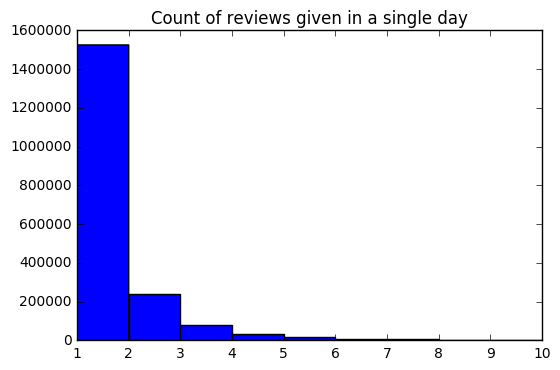

In [5]:
plt.title('Count of reviews given in a single day')
plt.hist(numbers_of_reviews,bins=max(numbers_of_reviews)-1)
plt.xlim(1,10)
plt.show()

For the most part, users tend not to review multiple businesses per day, and when they do, it's usually not many more than 2 or 3.

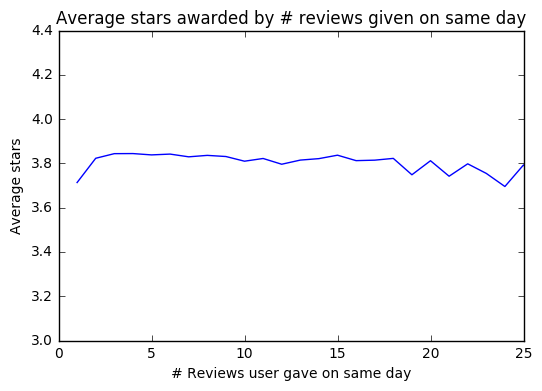

In [6]:
average_stars_by_n_reviews = np.array([[n, np.mean(stars)] for n, stars in ratings_by_n_reviews.items()])
plt.plot(*average_stars_by_n_reviews.T)
plt.xlim(0, 25)
plt.title('Average stars awarded by # reviews given on same day')
plt.ylabel('Average stars')
plt.xlabel('# Reviews user gave on same day')
plt.show()

So although it's not that pronounced, it does seem like users tend to give slightly higher reviews when they're reviewing multiple businesses in the same day (that initial jump from 3.7 to 3.85ish). That's consistent with the theory that sometimes Yelpers log on reactively to give negative ratings to individual places they just visited, whereas other times they log on more contemplatively to review multiple businesses at a time. The effect may not be that pronounced, though.

If we dig deeper into the distribution of ratings conditioned on # reviews per day, maybe we can find evidence for or against this theory:

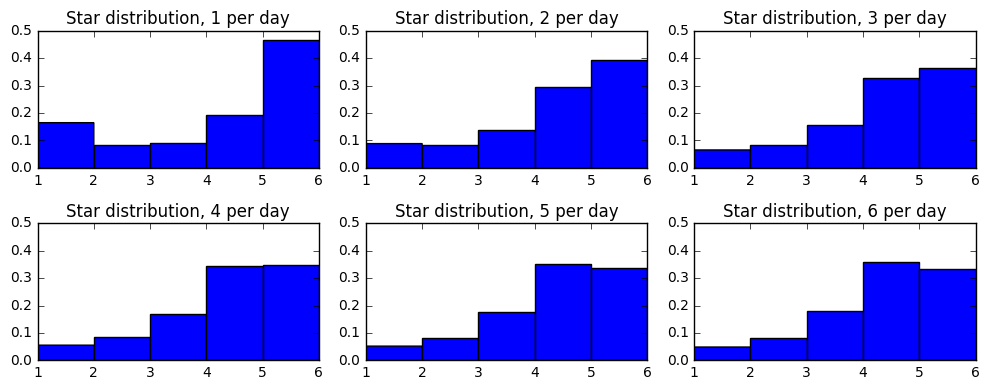

In [21]:
with figure_grid(2,3,rowheight=2) as grid:
    for i, _axis in enumerate(grid.each_subplot(), 1):
        plt.title('Star distribution, {} per day'.format(i))
        plt.ylim((0,0.5))
        plt.hist(ratings_by_n_reviews[i], bins=range(1,7), normed=True)

Cool. So it looks like users, when they only give one review on a given day, award relatively more 1s and 5s, which makes intuitive sense (they loved or hated a place). When they give multiple reviews per day, regardless of whether that's 2, 3, or more, they tend to be much more likely to choose 3s and 4s.